# Programming Assignment-3 (Pavan Kumar Mistry)

==================================================================================================================

## Association Rule Generation from Transaction Data

### C. Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset? (0.5 point) (see http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [1]:
import pandas as pd

In [2]:
loaded_data = pd.read_csv("Grocery_Items_42.csv")

In [3]:
dataset = loaded_data.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
dataset[0:20]

[['specialty chocolate', 'soda', 'pet care'],
 ['frankfurter', 'canned beer'],
 ['bottled beer', 'cream cheese ', 'chocolate'],
 ['pastry', 'sliced cheese'],
 ['rolls/buns', 'shopping bags', 'cat food'],
 ['other vegetables', 'other vegetables'],
 ['whipped/sour cream', 'seasonal products'],
 ['sausage',
  'whole milk',
  'long life bakery product',
  'UHT-milk',
  'flour',
  'chocolate'],
 ['beef', 'condensed milk'],
 ['rolls/buns', 'soda'],
 ['ice cream', 'chewing gum'],
 ['specialty bar', 'candy'],
 ['root vegetables',
  'yogurt',
  'soda',
  'shopping bags',
  'oil',
  'shopping bags'],
 ['chicken', 'pork', 'frozen fish'],
 ['sausage', 'dessert'],
 ['tropical fruit', 'cat food'],
 ['whole milk',
  'rolls/buns',
  'tropical fruit',
  'other vegetables',
  'cake bar',
  'rolls/buns',
  'curd'],
 ['other vegetables', 'other vegetables', 'soda', 'dish cleaner'],
 ['pork', 'spread cheese'],
 ['frankfurter', 'pip fruit']]

In [4]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [5]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.021250,(UHT-milk)
1,0.032875,(beef)
2,0.020875,(berries)
3,0.016500,(beverages)
4,0.044000,(bottled beer)
...,...,...
62,0.010875,"(rolls/buns, other vegetables)"
63,0.015500,"(whole milk, other vegetables)"
64,0.013625,"(rolls/buns, whole milk)"
65,0.010125,"(soda, whole milk)"


In [7]:
# Association rule mining
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.106875,0.12500,0.010875,0.101754,0.814035,-0.002484,0.974121,-0.203686
1,(other vegetables),(whole milk),0.125000,0.15975,0.015500,0.124000,0.776213,-0.004469,0.959189,-0.247834
2,(rolls/buns),(whole milk),0.106875,0.15975,0.013625,0.127485,0.798031,-0.003448,0.963021,-0.220802
3,(soda),(whole milk),0.095125,0.15975,0.010125,0.106439,0.666284,-0.005071,0.940339,-0.356298
4,(yogurt),(whole milk),0.085000,0.15975,0.011125,0.130882,0.819295,-0.002454,0.966785,-0.194231


### what are the association rules you can extract from your dataset?
##### 1. If (rolls/buns) are purchased, then (other vegetables) are also likely to be purchased.
+ support: 0.010875  -> About 1.08 % of the time, roll/buns and other vegetables are bought together.
+ confidence: 0.101754  -> There is about 10.18% chance that if someone buys rolls/buns, they will also buy other vegetables.
+ Lift: 0.814035  -> Rolls/buns and other vegetables are bought together about 81.4% more than we would expect if they were bought independenlty of each other.

##### 2. If someone buys other vegetables, they might also buy whole milk
+ support: 0.015500  -> These items are bought together in about 1.55% of transactions.
+ confidence: 0.124000  -> If someone buys other vegetables, there is a 12.4%  chance they will also buy whole milk.
+ Lift: 0.776213  -> Other vegetables and whole milk are bought together 77.6% more often than if they were bought separately.

##### 3. If someone buys rolls or buns, they might also buy whole milk.
+ support: 0.013625  -> These items are bought together in about 1.36% of transactions.
+ confidence: 0.127485  -> If rolls/buns are bought, there is about a 12.7% chance that whole milk will also be bought.
+ Lift: 0.798031  -> Rolls/buns and whole milk are bought together 79.8% more often than if they were bought separately.

##### 4. If someone buys soda, they might also buy whole milk.
+ support: 0.010125  -> Soda and whole milk are bought together in about 1.013% of transactions.
+ confidence: 0.106439  -> There is a 10.6% chance that someone who buys soda will also buy whole milk.
+ Lift: 0.666284  -> Soda and whole milk are bought together 67% more often than if they were bought separately.

##### 5. If someone buys yogurt, they might also buy whole milk
+ support: 0.011125  -> These items are bought together in about 1.1125% of transactions.
+ confidence: 0.130882  -> There is a 13.09% chance that someone who buys yogurt will also buy whole milk.
+ Lift: 0.819295 -> Yogurt and whole milk are bought together 82% more often than if they were bought separately.

### d. Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from the dataset. Construct a heatmap using Seaborn data visualization library 
#### (https://seaborn.pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x-axis is msv and the y-axis is mct. (2.5 points)

In [8]:
import pandas as pd

# Load dataset
loaded_data = pd.read_csv("Grocery_Items_42.csv")
dataset = loaded_data.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# top 20 dataset rows
dataset[:20]

[['specialty chocolate', 'soda', 'pet care'],
 ['frankfurter', 'canned beer'],
 ['bottled beer', 'cream cheese ', 'chocolate'],
 ['pastry', 'sliced cheese'],
 ['rolls/buns', 'shopping bags', 'cat food'],
 ['other vegetables', 'other vegetables'],
 ['whipped/sour cream', 'seasonal products'],
 ['sausage',
  'whole milk',
  'long life bakery product',
  'UHT-milk',
  'flour',
  'chocolate'],
 ['beef', 'condensed milk'],
 ['rolls/buns', 'soda'],
 ['ice cream', 'chewing gum'],
 ['specialty bar', 'candy'],
 ['root vegetables',
  'yogurt',
  'soda',
  'shopping bags',
  'oil',
  'shopping bags'],
 ['chicken', 'pork', 'frozen fish'],
 ['sausage', 'dessert'],
 ['tropical fruit', 'cat food'],
 ['whole milk',
  'rolls/buns',
  'tropical fruit',
  'other vegetables',
  'cake bar',
  'rolls/buns',
  'curd'],
 ['other vegetables', 'other vegetables', 'soda', 'dish cleaner'],
 ['pork', 'spread cheese'],
 ['frankfurter', 'pip fruit']]

In [9]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
import numpy as np

# Minimum support values and minimum confidence thresholds
list_of_msv = [0.001, 0.005, 0.01]
list_of_mct = [0.05, 0.075, 0.1]

# creating a matrix with zero values of size list_of_msv and list_of_mct
rule_counts = np.zeros((len(list_of_mct), len(list_of_msv)))
rule_counts

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# combining frequent itemsets and association rules for each msv and mct pair
for i, msv in enumerate(list_of_msv):
    frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
    for j, mct in enumerate(list_of_mct):
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        rule_counts[j, i] = len(rules)

rule_counts

array([[492.,  56.,  10.],
       [285.,  42.,   8.],
       [147.,  24.,   5.]])

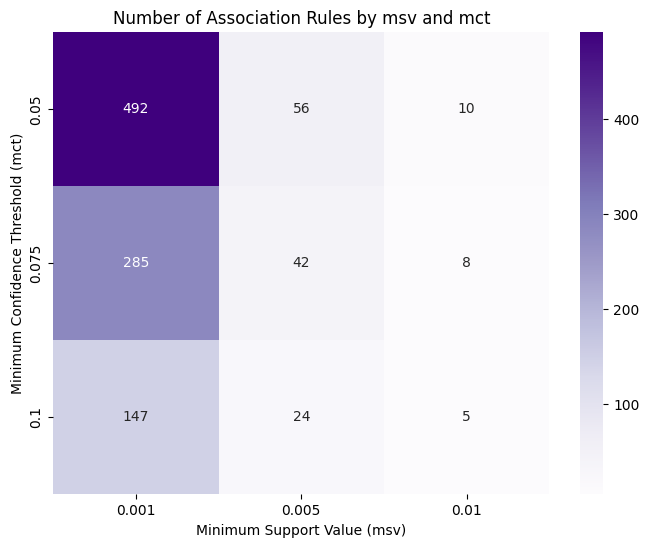

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(rule_counts, annot=True, fmt=".0f", cmap="Purples", xticklabels=list_of_msv, yticklabels=list_of_mct)
plt.title("Number of Association Rules by msv and mct")
plt.xlabel("Minimum Support Value (msv)")
plt.ylabel("Minimum Confidence Threshold (mct)")
plt.show()

### e. Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset for minimum support = 0.005 and minimum confident threshold = 0.075. Show the association rules for both sets. Which association rules appeared in both sets (note that there could be none)? (1 point)

In [13]:
from sklearn.model_selection import train_test_split

# split the dataset into 50 : 50 (i.e, 2 equal subsets)
subset1, subset2 = train_test_split(dataset, test_size=0.5, random_state=42)

In [14]:
# function to get association rule
def get_association_rules(data):
    te = TransactionEncoder()
    te_ary = te.fit(data).transform(data)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.075)
    return rules

In [15]:
# association rules for each subset
rules_subset1 = get_association_rules(subset1)
rules_subset2 = get_association_rules(subset2)

### Show the association rules for both sets.
##### Association Rules for Subset 1:

In [16]:
rules_subset1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.04225,0.16100,0.00675,0.159763,0.992319,-0.000052,0.998528,-0.008017
1,(bottled water),(other vegetables),0.05975,0.12575,0.00650,0.108787,0.865102,-0.001014,0.980966,-0.142251
2,(bottled water),(soda),0.05975,0.09600,0.00500,0.083682,0.871688,-0.000736,0.986557,-0.135363
3,(bottled water),(whole milk),0.05975,0.16100,0.00525,0.087866,0.545752,-0.004370,0.919821,-0.469559
4,(brown bread),(whole milk),0.04025,0.16100,0.00625,0.155280,0.964469,-0.000230,0.993228,-0.036966
5,(canned beer),(whole milk),0.04825,0.16100,0.00800,0.165803,1.029833,0.000232,1.005758,0.030437
6,(citrus fruit),(rolls/buns),0.04975,0.10850,0.00575,0.115578,1.065234,0.000352,1.008003,0.064445
7,(citrus fruit),(whole milk),0.04975,0.16100,0.00750,0.150754,0.936359,-0.000510,0.987935,-0.066751
8,(frankfurter),(whole milk),0.04200,0.16100,0.00650,0.154762,0.961254,-0.000262,0.992620,-0.040376
9,(margarine),(other vegetables),0.03475,0.12575,0.00525,0.151079,1.201425,0.000880,1.029837,0.173691


##### Association Rules for Subset 2:

In [17]:
rules_subset2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.03250,0.15850,0.00500,0.153846,0.970638,-0.000151,0.994500,-0.030318
1,(bottled beer),(other vegetables),0.04575,0.12425,0.00650,0.142077,1.143473,0.000816,1.020779,0.131487
2,(bottled beer),(whole milk),0.04575,0.15850,0.00550,0.120219,0.758477,-0.001751,0.956488,-0.250205
3,(bottled water),(whole milk),0.06050,0.15850,0.00525,0.086777,0.547488,-0.004339,0.921462,-0.468014
4,(domestic eggs),(whole milk),0.04025,0.15850,0.00550,0.136646,0.862120,-0.000880,0.974687,-0.142837
5,(frankfurter),(other vegetables),0.03600,0.12425,0.00550,0.152778,1.229600,0.001027,1.033672,0.193700
6,(fruit/vegetable juice),(whole milk),0.03500,0.15850,0.00500,0.142857,0.901307,-0.000548,0.981750,-0.101908
7,(newspapers),(other vegetables),0.04150,0.12425,0.00525,0.126506,1.018157,0.000094,1.002583,0.018605
8,(newspapers),(whole milk),0.04150,0.15850,0.00550,0.132530,0.836152,-0.001078,0.970063,-0.169738
9,(pastry),(other vegetables),0.05575,0.12425,0.00575,0.103139,0.830093,-0.001177,0.976461,-0.178152


### Which association rules appeared in both sets (note that there could be none)?

In [18]:
both_sets = pd.merge(rules_subset1, rules_subset2, on=list(rules_subset1.columns))

print("Association Rules Appearing in Both Subsets")
both_sets

Association Rules Appearing in Both Subsets


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


## 2. Image Classification using CNN

Construct a 4-class classification model using a convolutional neural network with the following simple architecture
+ 1 Convolutional Layer with 8 3 × 3 filters.
+ 1 max pooling with 2 × 2 pool size
+ Flatten the Tensor
+ 1 hidden layer with 16 nodes for fully connected neural network
+ Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function

(Use ’Relu’ for all layers except the output layer.) for 20 epochs using ‘adam’ optimizer and ‘categorical
cross entropy’ loss function. If your machine is too slow, you can reduce to 5 epochs. You can
perform more epochs (> 20) if you want to. For validation split, you will use 20%. For batch size,
you can pick a size that will not slow down the training process on your machine. (see https:
//keras.io/examples/vision/mnist_convnet/)

+ Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and
validation accuracy - 2 curves) (1 points)
+ Perform ONE of the following experiment below ((a), (b) or (c)) based on the last digit of your
Rowan Banner ID (1 point):
+ (a) Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer (i) with all
other parameters unchanged
+ (b) Train the CNN using 2 other number of filters: 4 and 16 for the convolution layer (i) with all
other parameters unchanged
+ (c) Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other
parameters unchanged

If the last digit is {0, 1, 2, 3}, do (a). If the last digit is {4, 5, 6}, do (b). If the last digit is {7, 8, 9},
do (c). State your Rowan Banner ID in your submission so that we know which experiment you
are doing.

+ Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy -
2 curves) for the classification models using the above 2 different parameter values (1 points)
+ Describe and discuss what you observe by comparing the performance of the first model and the
other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there
model overfit or underfit or just right? (1 point)


In [43]:
import numpy as np
import os
from PIL import Image

interested_classes = [
    'n02099712-Labrador_retriever',
    'n02100735-English_setter',
    'n02113799-standard_poodle',
    'n02107312-miniature_pinscher'
]

base_path = os.getcwd()
image_path = os.path.join(base_path, 'images')

In [44]:
def load_data(directory, target_size=(128, 128)):
    data = []
    labels = []
    class_names = os.listdir(directory)

    for class_index, class_name in enumerate(interested_classes):
        if class_name in class_names:
            class_dir = os.path.join(directory, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = Image.open(image_path).convert('RGB')
                image = image.resize(target_size)
                data.append(np.array(image))
                labels.append(class_index)

    # Normalize the image data
    X = np.array(data) / 255.0  
    y = to_categorical(labels, num_classes=len(interested_classes))

    return X, y

In [48]:
# load dataset values for particular image path
X, y = load_data(image_path)

X[:50]

array([[[[0.04705882, 0.09803922, 0.03137255],
         [0.04313725, 0.09411765, 0.02745098],
         [0.04313725, 0.09411765, 0.01568627],
         ...,
         [0.13333333, 0.2       , 0.02352941],
         [0.10588235, 0.19607843, 0.02352941],
         [0.15294118, 0.25882353, 0.03921569]],

        [[0.04705882, 0.09019608, 0.02745098],
         [0.07058824, 0.11764706, 0.04705882],
         [0.04705882, 0.09411765, 0.01176471],
         ...,
         [0.14509804, 0.20392157, 0.03921569],
         [0.08627451, 0.16862745, 0.01960784],
         [0.15294118, 0.25882353, 0.04705882]],

        [[0.03529412, 0.07843137, 0.01176471],
         [0.05098039, 0.09411765, 0.01960784],
         [0.07843137, 0.12156863, 0.03137255],
         ...,
         [0.20392157, 0.26666667, 0.05882353],
         [0.14509804, 0.21960784, 0.03529412],
         [0.12941176, 0.22352941, 0.01176471]],

        ...,

        [[0.38431373, 0.40784314, 0.11764706],
         [0.3254902 , 0.37254902, 0.08627451]

In [49]:
y[:50]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [50]:
# split the dataset into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import tensorflow as tf

# Convert images to grayscale
x_train_grayscale = tf.image.rgb_to_grayscale(X_train)
x_val_grayscale = tf.image.rgb_to_grayscale(X_val)

def build_and_train_model(filter_size, x_train, y_train, x_val, y_val):
    model = models.Sequential([
        layers.Conv2D(8, (filter_size, filter_size), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(len(interested_classes), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=64)

In [68]:
# My rowan banner ID is 916464872 and last digit is 2, so i have to do question (a)

history_3x3 = build_and_train_model(3, x_train_grayscale, y_train, x_val_grayscale, y_val)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2091 - loss: 1.7792 - val_accuracy: 0.2519 - val_loss: 1.5294
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2954 - loss: 1.3913 - val_accuracy: 0.2000 - val_loss: 1.5192
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3348 - loss: 1.3393 - val_accuracy: 0.2370 - val_loss: 1.4451
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3522 - loss: 1.2924 - val_accuracy: 0.3185 - val_loss: 1.4163
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4269 - loss: 1.2567 - val_accuracy: 0.2963 - val_loss: 1.3876
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4982 - loss: 1.1677 - val_accuracy: 0.2667 - val_loss: 1.4145
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4755 - loss: 1.1673 - val_accuracy: 0.3556 - val_loss: 1.3439
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5819 - loss: 1.0480 - val_accuracy: 0.3778 - val_loss: 1.2761


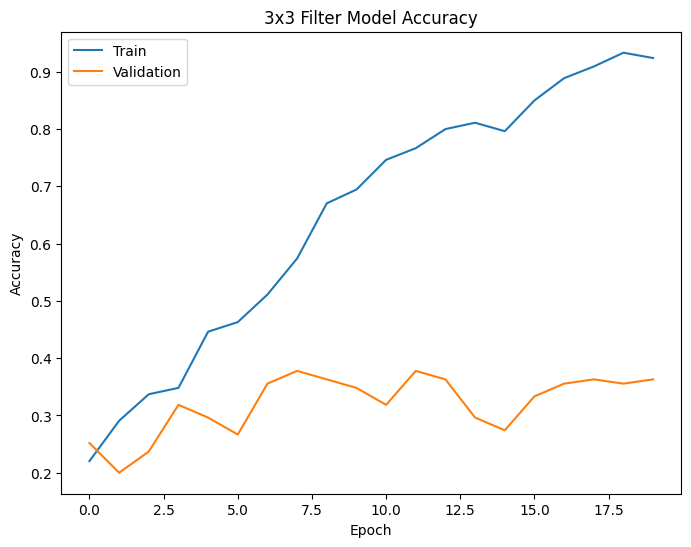

In [86]:
plt.figure(figsize=(8, 6))

plt.plot(history_3x3.history['accuracy'])
plt.plot(history_3x3.history['val_accuracy'])
plt.title('3x3 Filter Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [87]:
history_5x5 = build_and_train_model(5, x_train_grayscale, y_train, x_val_grayscale, y_val)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2728 - loss: 1.8697 - val_accuracy: 0.2667 - val_loss: 1.4188
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2840 - loss: 1.3726 - val_accuracy: 0.3333 - val_loss: 1.3567
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3360 - loss: 1.3571 - val_accuracy: 0.2889 - val_loss: 1.3418
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3715 - loss: 1.3259 - val_accuracy: 0.2963 - val_loss: 1.3362
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4116 - loss: 1.3034 - val_accuracy: 0.3926 - val_loss: 1.3357
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3989 - loss: 1.2827 - val_accuracy: 0.3185 - val_loss: 1.3284
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4478 - loss: 1.2472 - val_accuracy: 0.3926 - val_loss: 1.3742
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4031 - loss: 1.2550 - val_accuracy: 0.2000 - val_loss: 1.3804


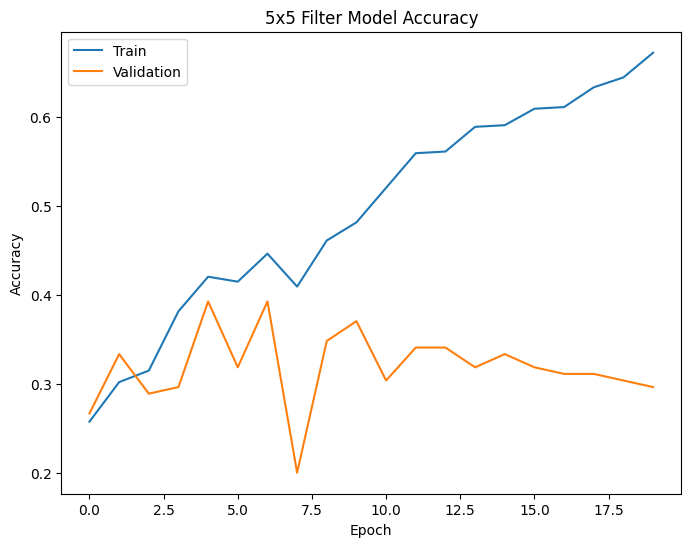

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(history_5x5.history['accuracy'])
plt.plot(history_5x5.history['val_accuracy'])
plt.title('5x5 Filter Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [82]:
history_7x7 = build_and_train_model(7, x_train_grayscale, y_train, x_val_grayscale, y_val)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2099 - loss: 1.6922 - val_accuracy: 0.3407 - val_loss: 1.3571
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2714 - loss: 1.3913 - val_accuracy: 0.2741 - val_loss: 1.4006
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2908 - loss: 1.3624 - val_accuracy: 0.3556 - val_loss: 1.3310
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3177 - loss: 1.3459 - val_accuracy: 0.2889 - val_loss: 1.3689
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3526 - loss: 1.3010 - val_accuracy: 0.3111 - val_loss: 1.3829
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3817 - loss: 1.2411 - val_accuracy: 0.3778 - val_loss: 1.2965
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4254 - loss: 1.1609 - val_accuracy: 0.3185 - val_loss: 1.3131
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4489 - loss: 1.1205 - val_accuracy: 0.2889 - val_loss: 1.3388


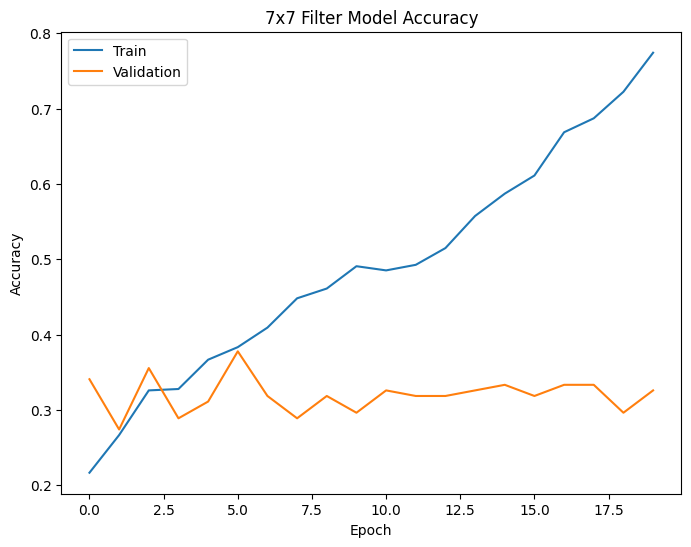

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(history_7x7.history['accuracy'])
plt.plot(history_7x7.history['val_accuracy'])
plt.title('7x7 Filter Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Describe and discuss what you observe by comparing the performance of the first model and the other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there model overfit or underfit or just right?

#### 3 X 3 Filter model:
+ The 3x3 filter model demonstrates an increase, in training accuracy with each epoch indicating that the model is effectively learning from the training data.
+ However the validation accuracy lags behind. Shows improvement suggesting that the model struggles to generalize well to unseen data hinting at potential overfitting. 

#### 5 X 5 Filter model:
+ Moving on to the 5x5 filter model we observe a trend of improving training accuracy over epochs.
+ The validation accuracy remains consistently lower than the training accuracy and fluctuates significantly pointing towards overfitting issues and poor generalization on the validation set.

#### 7 X 7 Filter model:
+ In comparison the 7x7 filter model displays an enhancement in training accuracy indicating that larger filters help capture features effectively from the training data.
+ Although the validation accuracy still falls short of the training accuracy it exhibits a pattern compared to the 5x5 model.
+ However, there remains a gap between training and validation accuracies signaling overfitting challenges.

#### Discussion
+ The three models exhibit signs of overfitting indicated by the training accuracy in contrast, to the validation accuracy which means that while the models are learning the training data well, they are not as effective at predicting new or unseen data.
+ To address overfitting we might consider implementing strategies such, as incorporating dropout layers applying data augmentation utilizing regularization techniques or even simplifying the models structure.
+ To combat overfitting one could also consider acquiring data if available, to help the model to understand a range of variations, in the input domain.

In summary it would be helpful for the models to enhance their ability to generalize effectively so that the accuracy, on the validation set matches that of the training set, without differences.